In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

In [2]:
def dim_matrix(matrix):
    return len(matrix),len(matrix[0])

def diag_to_matrix(array):
    length = len(array)
    matrix = np.zeros([length,length])

    for row in range(0, length):
        matrix[row][row] = array[row]

    return matrix

In [3]:
data  = pd.read_excel( "C:/Users/michelj8/Documents/GitHub/Dynamic-MESS/china_air_quality.xlsx")
# region_names = ['New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']

data.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [ ]:
data = data[['year','month','day','hour','season',]]

In [4]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [4]:
region_data = data[data['GeoName'].isin(region_names)].copy()
region_data = region_data[ region_data['Description'] == 'Total employment (number of jobs)']

region_data = region_data.set_index('GeoName')
year_list = range(1998,2019)

region_data = region_data[year_list]
region_data

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
GeoName,,,,,,,,,,,,,,,,,,,,,
New England,8360643,8512502,8739633,8766028,8712200,8696594,8808905,8901095,8997854,9167892,...,8935933,8892185,9003399,9112599,9266260,9411093,9656177,9775870,9888789,10032617
Mideast,25170029,25710165,26409297,26495670,26442196,26528689,26904113,27308630,27713122,28251978,...,27759001,27763099,28281659,28578752,28989781,29461455,29957286,30370445,30741798,31321909
Great Lakes,25953106,26332508,26830018,26554355,26272457,26219630,26440226,26681985,26874698,27135396,...,25773421,25659131,26127720,26416804,26731751,27123259,27532766,27811630,28086812,28477785
Plains,12239692,12410535,12604124,12601236,12519065,12521105,12673709,12862597,13061326,13280494,...,12991460,12918121,13099492,13262142,13446202,13614283,13781118,13866278,13969215,14133325
Southeast,38013686,38801665,39694005,39630074,39666968,40061948,41037086,42109692,43150569,44064521,...,42223496,42065743,42886195,43433405,44149358,45199079,46288702,47173634,48250911,49226831
Southwest,17034267,17352947,17899573,18099376,18110913,18266256,18654514,19316887,20043704,20726409,...,20639897,20634234,21143618,21670433,22224964,22805342,23340442,23709993,24302171,24904537
Rocky Mountain,5620655,5752111,5952793,6006793,6002340,6023298,6166380,6370711,6589192,6847953,...,6685768,6634557,6760523,6881972,7054731,7252207,7456171,7644026,7851089,8053953
Far West,26089122,26658867,27241357,27368668,27368961,27603980,28154767,28786803,29438135,30069057,...,28627724,28334630,28789094,29623593,30462053,31367082,32303138,33020024,33734515,34595043


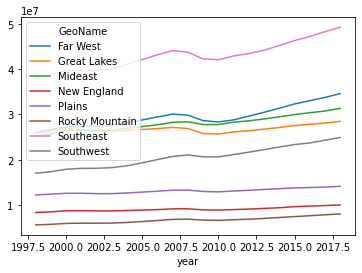

In [5]:
region_data_long = region_data.reset_index().melt( id_vars=['GeoName'], var_name='year', value_name = 'value')
region_data_long['value'] = region_data_long['value'].astype(float)
region_data = pd.pivot_table( region_data_long, index = 'year', columns = 'GeoName' , values = 'value')
region_data.plot()

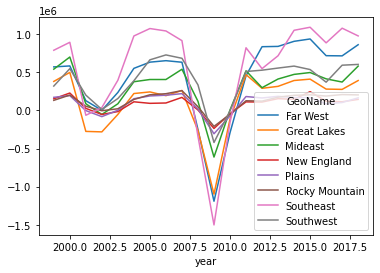

In [6]:
delta_region_data = region_data.diff(1).dropna()
dynamic_spatial_data =  pd.pivot_table(delta_region_data.reset_index(), columns = 'year').loc[region_names]

delta_region_data.plot()

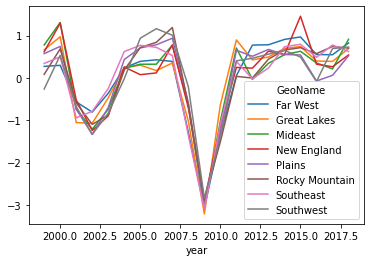

In [7]:
spatial_df = dynamic_spatial_data.copy()

series_means = spatial_df.mean(axis = 1)
normalized_spatial_df = spatial_df.copy()
normalized_spatial_df = normalized_spatial_df.sub(series_means, axis = 0)
series_sd = normalized_spatial_df.std(axis = 1)
normalized_spatial_df = normalized_spatial_df.div(series_sd, axis = 0)
year_list = normalized_spatial_df.columns

pd.pivot_table( normalized_spatial_df.reset_index(), columns = 'GeoName').plot()

## Choices for weight matrix here: VAR based weights (correlations),  geography, and uniform

In [8]:
# #Matrix coming from a VAR specification
# #VAR analysis on the normalized dataset
norm_means = delta_region_data.mean(axis =0)
norm_delta_region = delta_region_data.sub(norm_means, axis =1)

norm_sd = norm_delta_region.std(axis =0)
norm_delta_region = norm_delta_region.div(norm_sd, axis =1)

model = VAR(delta_region_data).fit()
# model = VAR(norm_delta_region).fit()

var_matrix = model.params
mod_region_names = ['L1.'+x for x in region_names]
var_matrix = var_matrix.loc[mod_region_names][region_names].values

def max_zero(x):
    return max(x,0.0)

var_weight_matrix = np.vectorize(max_zero)(var_matrix) 
for ind in range(0,len(var_weight_matrix)):
    var_weight_matrix[ind,ind] =0
    
var_weight_matrix = pd.DataFrame(var_weight_matrix)
var_weight_matrix
var_weight_matrix = var_weight_matrix.div( var_weight_matrix.sum(axis = 1), axis = 0)
var_weight_matrix = var_weight_matrix.fillna(0)
var_weight_matrix = var_weight_matrix.values

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [9]:
# #Weight matrix based on adjacent neighbors
map_weight_matrix = np.zeros([8,8])

map_weight_matrix[0,1] = 1.0
map_weight_matrix[1,[0,2,4]] = 1.0/3.0
map_weight_matrix[2,[1,3,4]] = 1.0/3.0
map_weight_matrix[3,[2,4,5,6]] = 1.0/4.0
map_weight_matrix[4,[1,2,3,5]] = 1.0/4.0
map_weight_matrix[5,[3,4,6,7]] = 1.0/4.0
map_weight_matrix[6,[3,5,7]] = 1.0/3.0
map_weight_matrix[7,[5,6]] = 1.0/2.0

In [10]:
unif_weight_matrix = np.ones([len(dynamic_spatial_data), len(dynamic_spatial_data)])
unif_weight_matrix = unif_weight_matrix/len(dynamic_spatial_data)

for ind in range(0,len(unif_weight_matrix)):
    unif_weight_matrix[ind,ind] =0

# Define the forecasting functions here

In [11]:
def forecast_k_ahead(theta, k, spatial_df, w_matrix):
    no_series = len(spatial_df)
    
    #In this section we normalize the data to be forecasted, giving it mean 0 and s.d. 1
    series_means = spatial_df.mean(axis = 1)
    normalized_spatial_df = spatial_df.copy()
    normalized_spatial_df = normalized_spatial_df.sub(series_means, axis = 0)
    series_sd = normalized_spatial_df.std(axis = 1)
    normalized_spatial_df = normalized_spatial_df.div(series_sd, axis = 0)
    
#     alpha = np.array(theta[0:8]).reshape([8,1])
    rho = theta[0]
    phi = theta[1]
    lam = theta[2]
    
    id_matrix = diag_to_matrix(no_series*[1])
    aux_matrix = rho* id_matrix + phi * w_matrix
    s_matrix = id_matrix - lam*w_matrix
    
    s_inv_matrix = np.linalg.inv(s_matrix)
    m_theta_matrix = np.dot(s_inv_matrix, aux_matrix)
    
    forecast_array = normalized_spatial_df.copy()
    for k_ahead in range(0,k):
#         forecast_array = np.dot(s_inv_matrix,alpha) + np.dot(m_theta_matrix, forecast_array)
        forecast_array = np.dot(m_theta_matrix, forecast_array)

    forecast_df = pd.DataFrame(forecast_array)
    forecast_df['region'] = region_names
    forecast_df = forecast_df.set_index('region')
    forecast_df = forecast_df.mul(series_sd, axis =0).add(series_means, axis =0 )
    forecast_df.columns = spatial_df.columns + k
    
    return forecast_df

In [12]:
def forecast_errors_k_ahead(theta,k, spatial_df, w_matrix):
    forecast_df = forecast_k_ahead(theta,k,spatial_df,w_matrix)
    
    data_years = list(spatial_df.columns)
    forecast_years = list(forecast_df.columns)
    overlap_years = [x for x in data_years if x in forecast_years]
    
    errors = forecast_df[overlap_years]-spatial_df[overlap_years]
    return errors

In [13]:
def sse_k_ahead(theta,k,spatial_df, w_matrix):
    error_df = forecast_errors_k_ahead(theta,k,spatial_df,w_matrix)
    return np.square(error_df).sum().sum()

In [14]:
import itertools
first_year = 1999
last_year_out = 2019
k = 1
weight_matrix = map_weight_matrix

def data_sse_k_ahead(theta,k,min_year, max_year,w_matrix):
    return sse_k_ahead(theta,k,dynamic_spatial_data[range(min_year,max_year)], w_matrix)

min_theta = [0,0,0]
min_errors = data_sse_k_ahead(min_theta,k,first_year, last_year_out, weight_matrix)

rho_grid = np.linspace(0,.6,10)
phi_grid = np.linspace(0,.1,10)
lam_grid = np.linspace(0,.05,10)

for theta in itertools.product(rho_grid, phi_grid, lam_grid):
    errors = data_sse_k_ahead(theta,k,first_year, last_year_out, weight_matrix)
    if errors < min_errors:
        min_theta = theta
        min_errors = errors
        
print(min_theta)
print( sse_k_ahead(min_theta,1,dynamic_spatial_data,weight_matrix ) )
print( sse_k_ahead([0,0,0],1,dynamic_spatial_data,weight_matrix ) )

(0.5333333333333333, 0.0, 0.0)
14404231649464.836
20277433408431.86


### Many AR(1)s

In [5]:
from statsmodels.tsa.arima_model import ARMA

ar_df = pd.DataFrame(columns = ['alpha','rho'])
sse = 0

for region in region_names:
    region_series = dynamic_spatial_data.loc[region].values
    model = ARMA(region_series, (1,0)).fit()
    ar_df.loc[region] = model.params
    sse = sse + np.square(region_series - model.predict()).sum()
    
print(sse)

NameError: name 'region_names' is not defined

In [16]:
ar_df

,alpha,rho
New England,83598.700001,0.434908
Mideast,307593.999998,0.376649
Great Lakes,126233.950000,0.414870
Plains,94681.650001,0.447333
Southeast,560657.250000,0.532347
Southwest,393513.500005,0.470837
Rocky Mountain,121664.900005,0.532584
Far West,425296.050000,0.630701


### Var Model

In [19]:
model = VAR(delta_region_data).fit()
model.params

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest
const,1.012265e+06,1.192622e+06,989167.279215,235646.717660,401592.151639,300332.725255,1.561234e+06,1.194112e+06
L1.Far West,5.132179e-01,-4.083542e-01,-0.398882,0.049539,-0.201466,-0.079313,2.433818e-01,-6.746560e-01
L1.Great Lakes,2.348734e+00,3.073557e+00,1.955212,0.505773,0.900160,0.525672,2.467037e+00,2.483676e+00
L1.Mideast,-3.479702e+00,-4.981912e+00,-3.471130,-0.716788,-1.579106,-1.145953,-5.397094e+00,-4.203463e+00
L1.New England,-8.705638e-01,-2.309329e-01,-0.041691,-0.399945,-0.486937,-0.067162,-1.072659e+00,-1.452912e+00
L1.Plains,1.077581e+00,4.025687e+00,3.293711,0.793153,1.964625,1.156954,4.036576e+00,4.819284e+00
L1.Rocky Mountain,-8.146148e-01,4.652950e+00,3.508871,0.443131,1.196432,1.067080,2.001441e+00,6.395266e+00
L1.Southeast,6.872914e-01,3.710969e-01,0.412550,0.092309,0.209051,0.197479,1.422440e+00,2.610848e-01
L1.Southwest,-9.076047e-01,-2.336194e+00,-1.740096,-0.428635,-0.681332,-0.527632,-2.842592e+00,-2.051352e+00


In [20]:
np.square(model.resid).sum().sum()

3561107283388.0654

### Moran's I-test

In [40]:
weight_matrix = unif_weight_matrix

spatial_df = dynamic_spatial_data.copy()

series_means = spatial_df.mean(axis = 1)
normalized_spatial_df = spatial_df.copy()
normalized_spatial_df = normalized_spatial_df.sub(series_means, axis = 0)
series_sd = normalized_spatial_df.std(axis = 1)
normalized_spatial_df = normalized_spatial_df.div(series_sd, axis = 0)
year_list = normalized_spatial_df.columns

for year in normalized_spatial_df.columns:
    year_vec = normalized_spatial_df[year]
    print(year, np.dot(np.dot(weight_matrix,year_vec),year_vec))

1999 0.9278956980944979
2000 4.285361002351182
2001 3.6722061302228517
2002 8.58504073909911
2003 2.8165481855949377
2004 0.4989844287225677
2005 1.8869696446870636
2006 2.1577097219822585
2007 3.820289969861726
2008 4.39319320314295
2009 63.587100815273246
2010 9.612634546845335
2011 1.1772246462538205
2012 0.5284796709465837
2013 1.8759369828442203
2014 3.0715794617862766
2015 4.3303799600936586
2016 0.6477133285708634
2017 1.4299211620802807
2018 3.3677125414876814


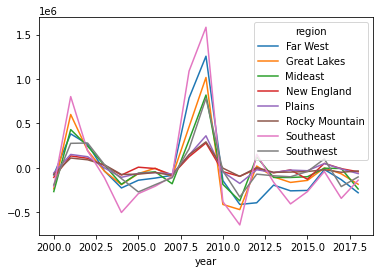

In [46]:
errors_df = forecast_errors_k_ahead([0.5333333333333333,0.0,0.0],1, spatial_df, weight_matrix)

pd.pivot_table(errors_df.reset_index(), columns='region').plot()

In [52]:
for year in range (2000,2018):
    year_vec = dynamic_spatial_data[year]
    error_vec = errors_df[year]
    print( year, np.dot(error_vec, np.dot(weight_matrix,year_vec)))

2000 -501819341584.1204
2001 62903185317.63957
2002 -70548232758.21417
2003 -1613318393.121667
2004 -442661638237.58374
2005 -337340240738.0054
2006 -240286432064.06876
2007 -321348759285.24835
2008 -63900786914.499176
2009 -3695999034831.7393
2010 95856010189.61334
2011 -866211288752.6392
2012 -41732073127.25379
2013 -288240153826.59503
2014 -449539157329.2513
2015 -427601712648.5371
2016 42303622333.763336
2017 -283292441517.07715
